<a href="https://colab.research.google.com/github/Deyonrose/ADA/blob/main/2348513_ADA_AIRPASSENGER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/AirPassengers - AirPassengers.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    144 non-null    object
 1   value   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
df.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
df.isnull().sum()


date     0
value    0
dtype: int64

In [6]:
df.dtypes

date     object
value     int64
dtype: object

In [7]:
df['date']= pd.to_datetime(df['date'])

In [41]:
data = df.set_index('date',inplace = False)

KeyError: "None of ['date'] are in the columns"

In [9]:
df.dtypes

value    int64
dtype: object

In [10]:
df.head()

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: title={'center': 'AirPassenger'}, xlabel='date'>

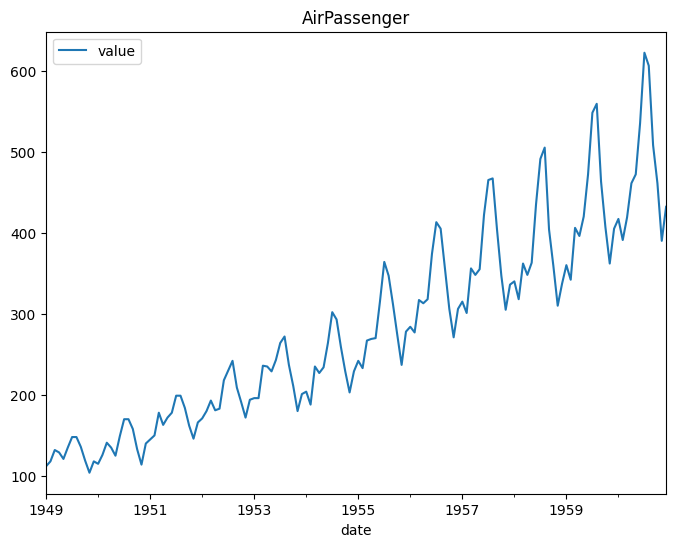

In [11]:
df.plot(figsize=(8,6), title='AirPassenger')

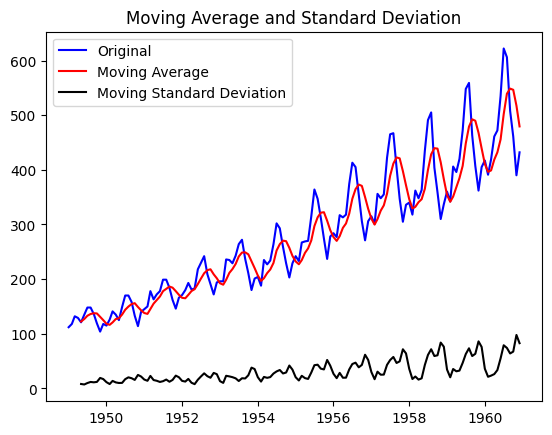

In [12]:
#ploting
movingavg=df.rolling(window=5).mean()
movingSTD=df.rolling(window=5).std()

plt.plot(df['value'], color='blue', label='Original')
plt.plot(movingavg, color='red', label='Moving Average')
plt.plot(movingSTD, color='black', label='Moving Standard Deviation')
plt.legend(loc='best')
plt.title('Moving Average and Standard Deviation')
plt.show()

ADF test is conducted with the following assumptions:


*   Null Hypothesis(HO): Series is non stationary, or series has a unit root.
*   Alternate Hypothesis (HA): Series is stationar, or series has no unit root.

if the null hypothesis is failed to be rejected, this test may provide evidence that the series is non-stationary.

Conditions to Reject Null Hypothesis(HO)



*   if Test statistic < Critical Value and p-value < 0.05 =Reject Null Hypothesis(HO), i.e, time series does not have a unit root, meaning its stationary.



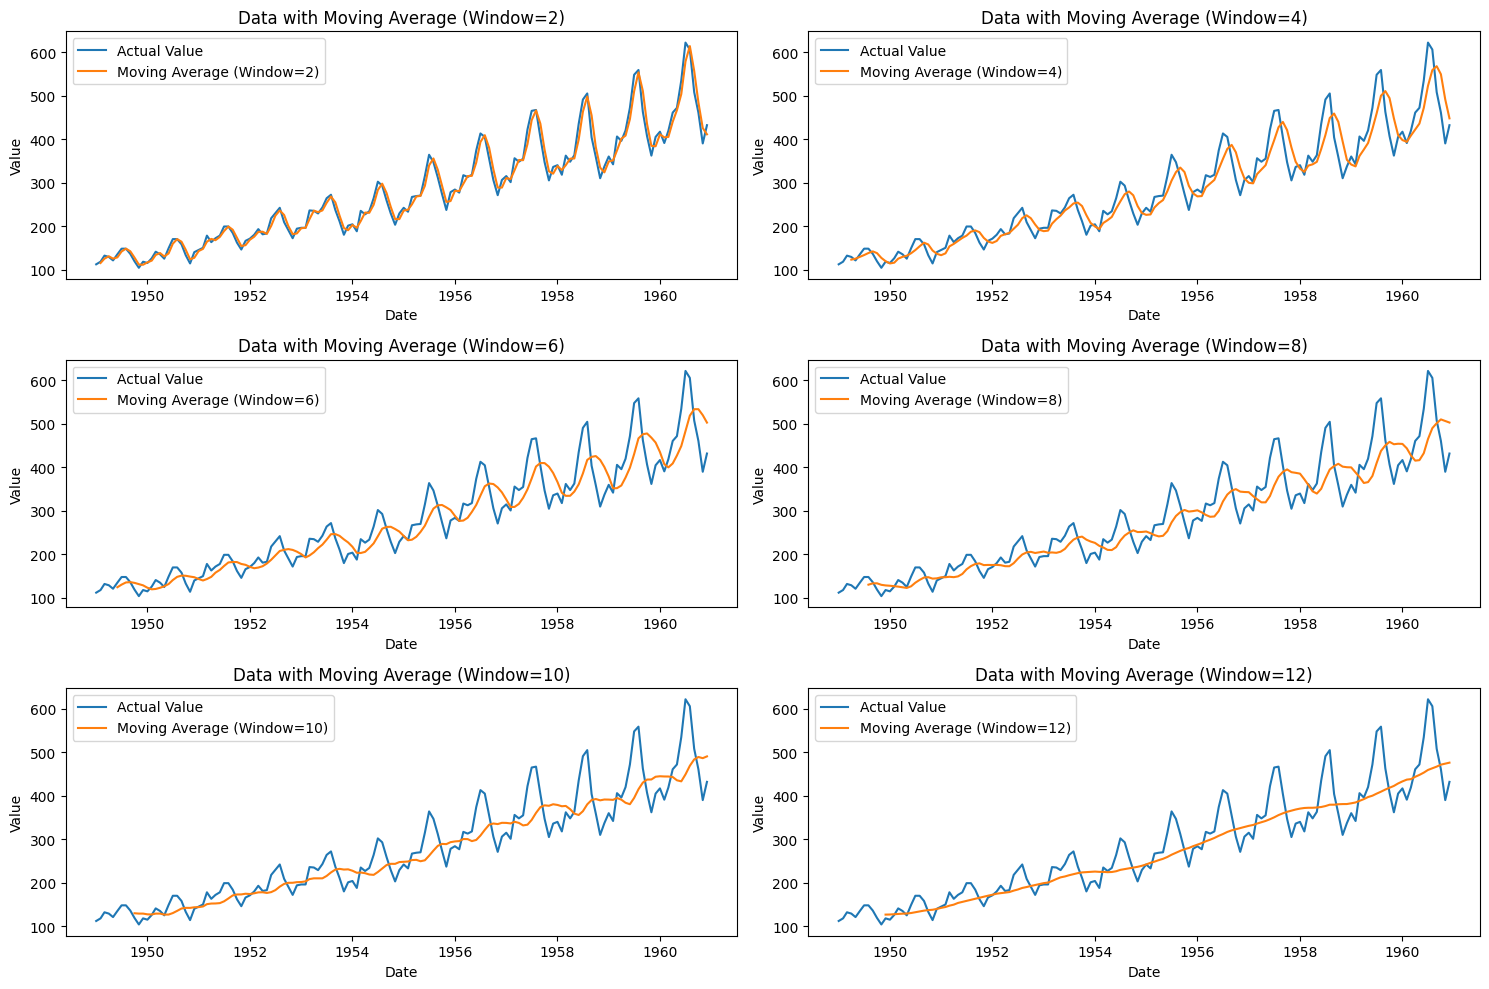

In [45]:
plt.figure(figsize=(15, 10))

# Plot 6 subplots with different window values
for i, window in enumerate([2, 4, 6, 8, 10, 12]):
    movingAverage = df.rolling(window=window).mean()
    plt.subplot(3, 2, i+1)
    plt.plot(df.index, df['value'], label='Actual Value')
    plt.plot(movingAverage.index, movingAverage['value'], label=f'Moving Average (Window={window})')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Data with Moving Average (Window={window})')
    plt.legend()

plt.tight_layout()
plt.show()


In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
#ADF Test
def adf_test(timeseries):
  print ('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)
adf_test(df['value'])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


so we accept null hypothesis ie airpassenger value is non stationary because both values  we are getting are greater than pvalue and critical value

In [15]:
from statsmodels.tsa.stattools import kpss

In [16]:
def kpss_test(timeseries):
  print ('Results of KPSS Test:')
  kpsstest = kpss(timeseries,regression='c', nlags='auto')
  kpss_output = pd.Series(kpsstest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
  for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
  print(kpss_output)
kpss_test(df['value'])

Results of KPSS Test:
Test Statistic                                                          1.651312
p-value                                                                     0.01
Lags Used                                                                      8
Number of Observations Used    {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%...
Critical Value (10%)                                                       0.347
Critical Value (5%)                                                        0.463
Critical Value (2.5%)                                                      0.574
Critical Value (1%)                                                        0.739
dtype: object


<ipython-input-16-fedcafee0126>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries,regression='c', nlags='auto')


DIFFERENCING

Y(t)=yt-y(t-1)
y is the value at time t

<Axes: xlabel='date'>

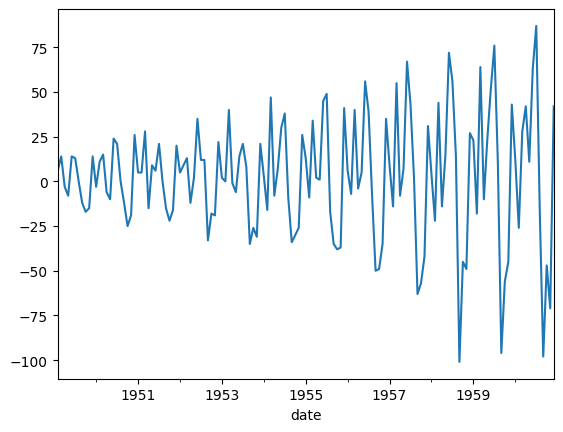

In [17]:
df['Value_diff']=df['value']-df['value'].shift(1)
df['Value_diff'].dropna().plot()



<Axes: xlabel='date'>

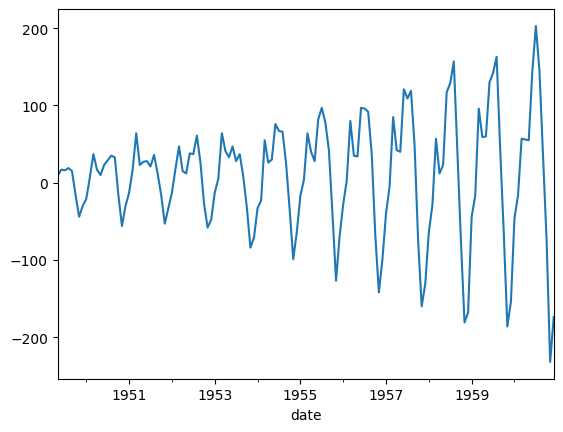

In [18]:
#seasonal differencing
n=4
df['value_diff_Seasonal']=df['value']-df['value'].shift(4)
df['value_diff_Seasonal'].dropna().plot()

Transformation :common transformation includde power transformation,square rootand log transformation
value small power transformation
huge value but std is small square root  transformation
range different log transformation


<Axes: xlabel='date'>

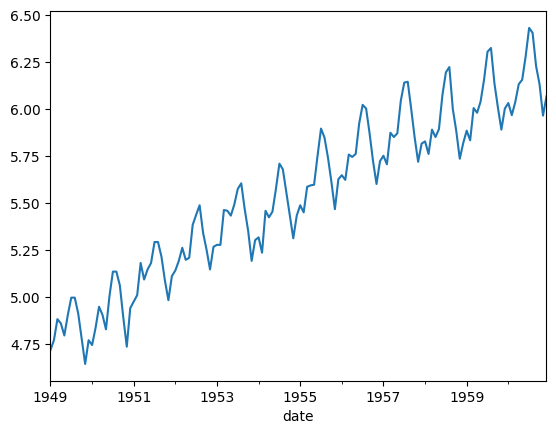

In [19]:
import numpy as np
df['value_log'] = np.log(df['value'])
df['value_log'].plot()


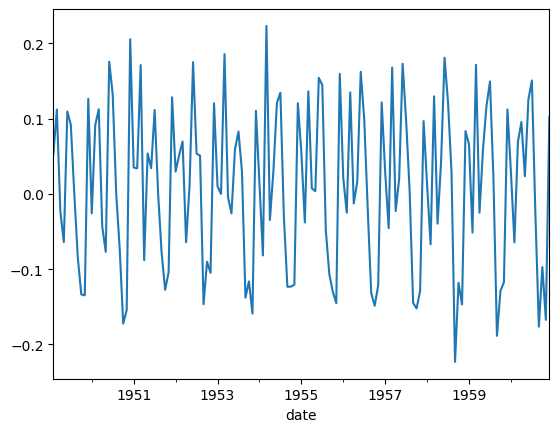

In [20]:
df['value_log']= np.log(df['value'])
df['value_log_diff'] = df['value_log'] - df['value_log'].shift(1)
df['value_log_diff'].dropna().plot()
plt.show()

Time series component

*additive model y(T)=trend+seasonality+

in additive trend and seasonality are independent


*multiplicative model
y(T)=

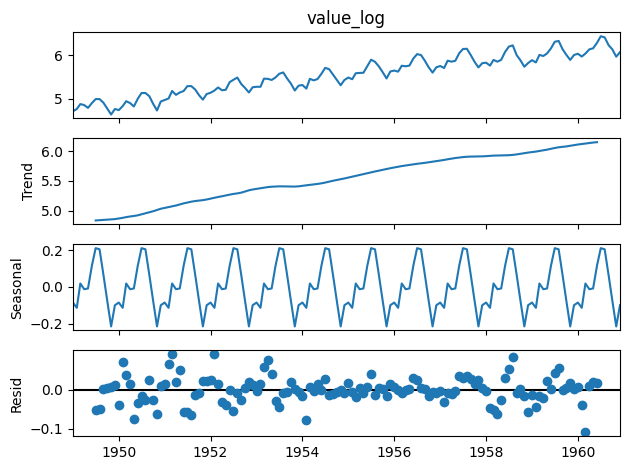

In [21]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(df['value_log'],model='additive')
decomposition.plot()
plt.show()

acf-auto correlation

pacf-partial auto correlation

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

BLUE SHADED SIGNIFICANT LEVEL

DOT CORRELATED VALUE

HIGHEST PEAK IN AUTO CORRELATION IS THE Q

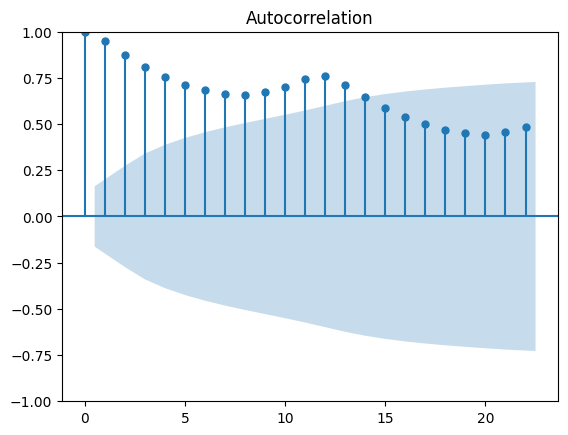

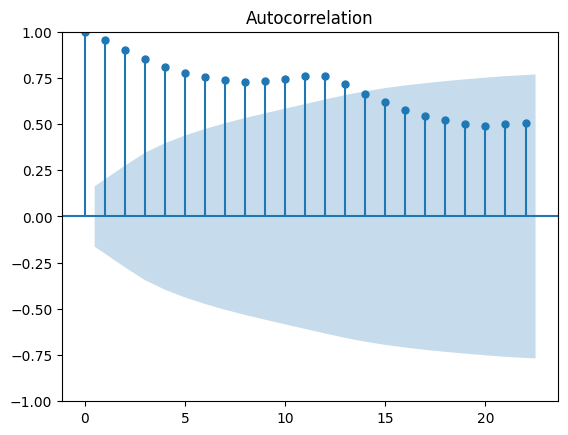

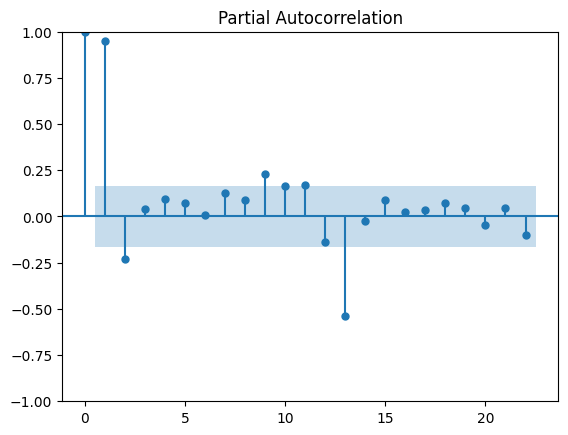

In [23]:
plot_acf(df['value'])
plt.show()

plot_acf(df['value_log'])
plt.show()
plot_pacf(df['value'])
plt.show()


ARIMA-INTEGRATES AUTO REGRESSION MODEL AND MOVING AVERAGE MODEL

P= NO OF LAG OBSERVATION  in AR terms. IT IS THE RECENT SPIKE OUTSIDE

THE SIGNIFICANT AREA (FOCUS ON THE DOT NOT THE LINE)

d=no of times the data is differenced I TERMS

Q= HIGHEST SPIKE

P AND Q CANNOT BE 0 FOR AN ARIMA MODEL

IF P IS 0 IT IS MA MODEL

IF Q IS 0 IT IS AR MODEL

P=2 Q=2 D IS DIFFERENCING IT IS 1

RECENTLY OUTSIDE SIGNIFICANTB IS P VALUE

HIGHEST SPIKE IS Q VALUE

ALWAYS OMIT 0TH VALUE SPIKE


FOR ARIMA MODEL WE CHOOSE 2 1 2 FOR ARIMA  MODEL

HERE P IS 2 WHICH IS RECENT SPIKE OUTSIDE THE SIGNIFICANT AREA AND

Q IS HIGHEST SPIKE

D IS THE DIFFERENCE


In [28]:
!pip install statsmodels
# Import the ARIMA class from the statsmodels library
from statsmodels.tsa.arima.model import ARIMA


In [29]:

# For AR with value
model_ar_value = ARIMA(df['value'], order=(2,1,0))
model_ar_value_fit = model_ar_value.fit()
rss_ar_value = np.sum((model_ar_value_fit.resid)**2)
print("RSS of AR (value):", rss_ar_value)

# For MA with value
model_ma_value = ARIMA(df['value'], order=(0,1,2))
model_ma_value_fit = model_ma_value.fit()
rss_ma_value = np.sum((model_ma_value_fit.resid)**2)
print("RSS of MA (value):", rss_ma_value)

# For ARIMA with value
model_arima_value = ARIMA(df['value'], order=(2,1,2))
model_arima_value_fit = model_arima_value.fit()
rss_arima_value = np.sum((model_arima_value_fit.resid)**2)
print("RSS of ARIMA (value):", rss_arima_value)

# For AR with log value
model_ar_log = ARIMA(df['value_log'], order=(2,1,0))
model_ar_log_fit = model_ar_log.fit()
rss_ar_log = np.sum((model_ar_log_fit.resid)**2)
print("RSS of AR (log value):", rss_ar_log)

# For MA with log value
model_ma_log = ARIMA(df['value_log'], order=(0,1,2))
model_ma_log_fit = model_ma_log.fit()
rss_ma_log = np.sum((model_ma_log_fit.resid)**2)
print("RSS of MA (log value):", rss_ma_log)

# For ARIMA with log value
model_arima_log = ARIMA(df['value_log'], order=(2,1,2))
model_arima_log_fit = model_arima_log.fit()
rss_arima_log = np.sum((model_arima_log_fit.resid)**2)
print("RSS of ARIMA (log value):", rss_arima_log)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

RSS of AR (value): 152347.61616545467
RSS of MA (value): 152619.4552524783


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used

RSS of ARIMA (value): 110035.99187358966
RSS of AR (log value): 23.778053553234475
RSS of MA (log value): 23.75282149709915
RSS of ARIMA (log value): 23.64212844578515


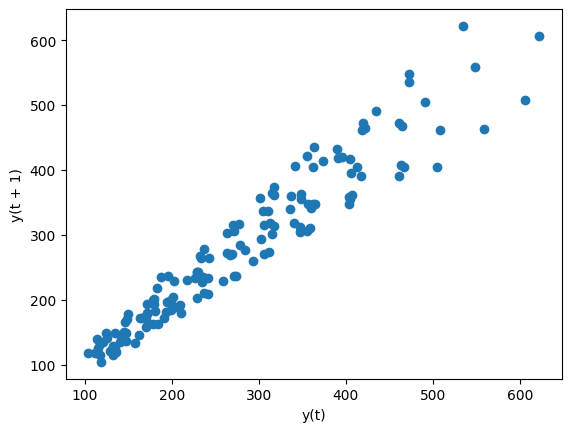

In [33]:
# check whether the given data set or time series is random or not
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(df['value'])
pyplot.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Plotting AR model


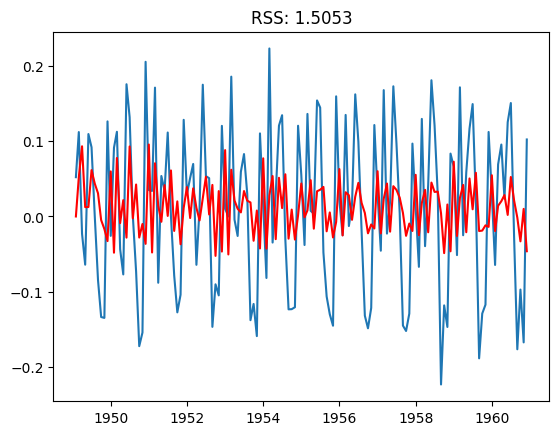

In [32]:
from statsmodels.tsa.arima.model import ARIMA

data_log = np.log(df['value']).diff().dropna()
model1 = ARIMA(data_log, order=(2, 1, 2))
results_AR = model1.fit()
plt.plot(data_log)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-data_log)**2))
print('Plotting AR model')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting AR model


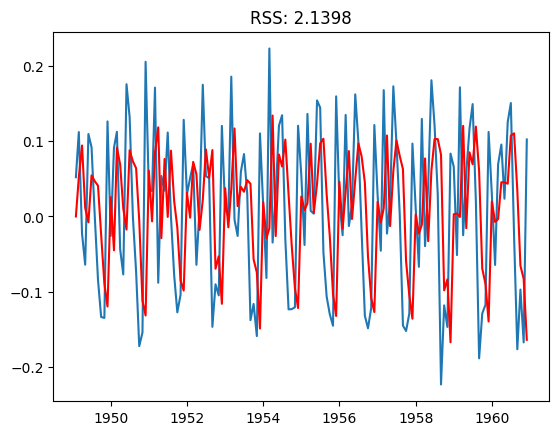

In [35]:
data_log = np.log(df['value']).diff().dropna()
model1 = ARIMA(data_log, order=(2, 1, 0))
results_AR = model1.fit()
plt.plot(data_log)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-data_log)**2))
print('Plotting AR model')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting AR model


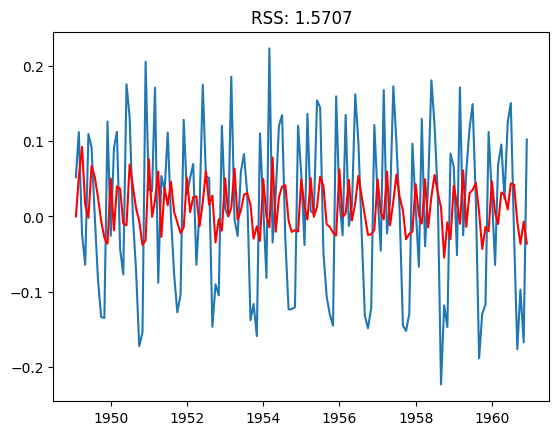

In [36]:
data_log = np.log(df['value']).diff().dropna()
model1 = ARIMA(data_log, order=(0, 1, 2))
results_AR = model1.fit()
plt.plot(data_log)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-data_log)**2))
print('Plotting AR model')

In [37]:
#calculate the error measure with actual and predicted value

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Calculate the error measure with actual and predicted value
error = mean_squared_error(data_log, results_AR.fittedvalues)
r2 = r2_score(data_log, results_AR.fittedvalues)
print(f"Mean Squared Error: {error}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.010983704442177618
R-squared: 0.025819324851382053


In [38]:
#CODE TO  calculate the MAE, RMSE

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the mean absolute error
mae = mean_absolute_error(data_log, results_AR.fittedvalues)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(data_log, results_AR.fittedvalues))

# Print the results
print(f"Mean absolute error: {mae}")
print(f"Root mean squared error: {rmse}")

Mean absolute error: 0.09062468330369308
Root mean squared error: 0.1048031700006141
